# Regression Evaluation Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/brain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [6]:
data['Gender'].value_counts()

1    134
2    103
Name: Gender, dtype: int64

In [14]:
data['Age Range'].value_counts()

2    127
1    110
Name: Age Range, dtype: int64

In [24]:
data = data.rename(columns={'Head Size(cm^3)': 'hs', 'Brain Weight(grams)':'bw', 'Age Range': 'age'})

In [25]:
data['hs'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: hs, dtype: float64

(0.0, 50.0)

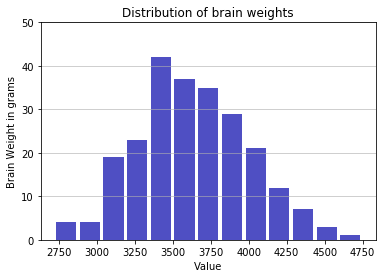

In [32]:
n, bins, patches = plt.hist(x=data['hs'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Brain Weight in grams')
plt.title('Distribution of brain weights')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [40]:
x = data.iloc[:, 2:3]
y = data.iloc[:, 3:4]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=30)

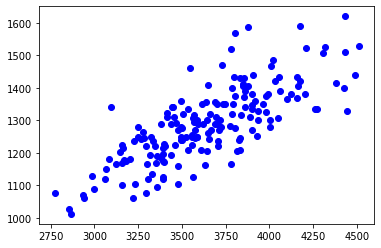

In [42]:
plt.scatter(x_train, y_train, c='blue')
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'Brain Weight')

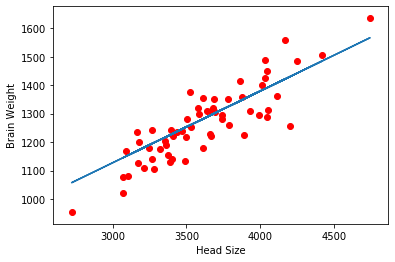

In [44]:
plt.plot(x_test, y_pred)
plt.scatter(x_test, y_test, c='red')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from math import sqrt

mean_squared_error(y_test, y_pred)

4592.056604460952

In [62]:
median_absolute_error(y_test, y_pred)

49.162776496673814

In [63]:
max_error(y_test, y_pred)

173.5543274772847

In [64]:
sqrt(mean_squared_error(y_test, y_pred))

67.76471504006308

In [67]:
r2_score(y_test, y_pred)

0.7200104721069523

### Mean Squared Error (MSE)

https://medium.com/@george.drakos62/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0

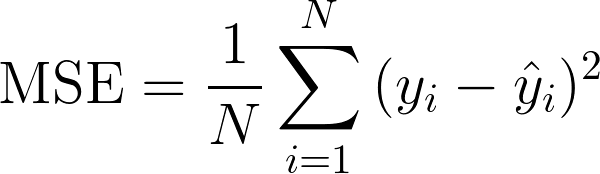

MSE measures averag squared error of our predictions. For each point, it calculates squared difference between predictions and actual. Then average those values. 

The higher the value, the worse the model is. It is never negative, since we are squaring. 

The advantage of this metric is, emphasizes the very low or very high values. The disadvantage of this metric is, 

### Root Mean Squared Error (RMSE)

RMSE is square of MSE. The square root is introduced to make scale of the errors to be same as the scale of the targets.

